# Biscuit Classification

### Import Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Visualization

In [2]:
from PIL import Image
from IPython.display import display

In [3]:
labels = os.listdir("Train/")
labels

['bad', 'good']

<Figure size 864x1440 with 0 Axes>

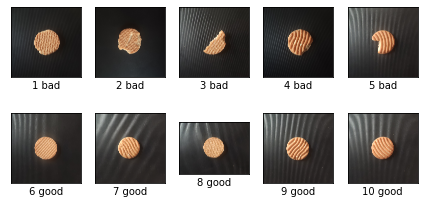

In [4]:
image_position = 0
plt.figure(0, figsize = (12,20))
fig, axes = plt.subplots(2,5)

for classes in os.listdir("Train/"):
    for sample in range(1,6):
        index = np.random.randint(len(os.listdir("Train/" + classes)))
        image = Image.open(r"Train/" + classes + "/" + os.listdir("Train/" + classes)[index])
        image_position += 1
        plt.subplot(2, 5, image_position)
        axes[os.listdir("Train/").index(classes),image_position if image_position<5 else image_position%5] = plt.imshow(image)
        plt.xlabel(str(image_position) + ' ' + classes)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()

In [5]:
total = 0

for classes in os.listdir("Train/"):
    print(str(len(os.listdir("Train/" + classes))) + " " + classes + " images")
    total += len(os.listdir("Train/" + classes))
print("The total number of images in the train set is ",total)

72 bad images
16 good images
The total number of images in the train set is  88


In [6]:
labels

['bad', 'good']

In [7]:
from skimage import transform
from skimage import io

In [10]:
data = []
label = []
i = 0
for classes in labels:
    for img in os.listdir('Train/'+ classes):
        image = io.imread('Train/'+ classes + '/' + img)
        image = transform.resize(image, (32,32))
        data.append(image)
        label.append(classes)
        i +=1
        if i%5 == 0:
            print("Processed {} images \nProcessing --------------------".format(i))

Processed 5 images 
Processing --------------------
Processed 10 images 
Processing --------------------
Processed 15 images 
Processing --------------------
Processed 20 images 
Processing --------------------
Processed 25 images 
Processing --------------------
Processed 30 images 
Processing --------------------
Processed 35 images 
Processing --------------------
Processed 40 images 
Processing --------------------
Processed 45 images 
Processing --------------------
Processed 50 images 
Processing --------------------
Processed 55 images 
Processing --------------------
Processed 60 images 
Processing --------------------
Processed 65 images 
Processing --------------------
Processed 70 images 
Processing --------------------
Processed 75 images 
Processing --------------------
Processed 80 images 
Processing --------------------
Processed 85 images 
Processing --------------------


In [39]:
np_data = np.array(data)
np_label = np.array([1 if x == 'good' else 0 for x in label])

In [47]:
print('Train shape', np_data.shape)
print('Train label shape', np_label.shape)

Train shape (88, 32, 32, 3)
Train label shape (88,)


Text(0.5, 1.0, 'Distribution - Imbalanced')

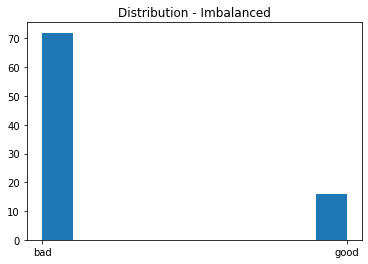

In [45]:
plt.hist(label)
plt.title('Distribution - Imbalanced')

In [46]:
#Storing the data so that it need not be processed every time
np.save('numpy_data', np_data)
np.save('numpy_label', np_label)

In [48]:
X = np.load('numpy_data.npy')
y = np.load('numpy_label.npy')
print('Train shape', X.shape)
print('Train label shape', y.shape)

Train shape (88, 32, 32, 3)
Train label shape (88,)


In [108]:
# Good class among the dataset
X_good = X[y==1]
y_good = y[y==1]
X_bad = X[y==0]
y_bad = y[y==0]

In [60]:
import cv2

In [107]:
X_good_c = X_good
y_good_c = y_good

#Flip for 1
for i in X_good:
    app = np.reshape(cv2.flip(i,1),(1,32,32,3))
    X_good_c = np.append(X_good_c,app, axis = 0)
    y_good_c = np.append(y_good_c,[1], axis = 0)

#Flip for -1    
for i in X_good:
    app = np.reshape(cv2.flip(i,-1),(1,32,32,3))
    X_good_c = np.append(X_good_c,app, axis = 0)
    y_good_c = np.append(y_good_c,[1], axis = 0)
    
#FLip for 0    
for i in X_good:
    app = np.reshape(cv2.flip(i,0),(1,32,32,3))
    X_good_c = np.append(X_good_c,app, axis = 0)
    y_good_c = np.append(y_good_c,[1], axis = 0) 
    
#Rotate 90 degree 
for i in X_good:
    app = np.reshape(cv2.rotate(i, cv2.cv2.ROTATE_90_CLOCKWISE) ,(1,32,32,3))
    X_good_c = np.append(X_good_c,app, axis = 0)
    y_good_c = np.append(y_good_c,[1], axis = 0) 
X_good_c.shape

(80, 32, 32, 3)

In [112]:
X_train = np.append(X_good_c, X_bad, axis = 0)
y_train = np.append(y_good_c, y_bad, axis = 0)
print("X_train shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)

X_train shape :  (152, 32, 32, 3)
y_train shape :  (152,)


Text(0.5, 1.0, 'Distribution - Balanced')

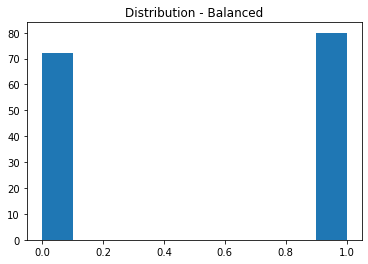

In [113]:
plt.hist(y_train)
plt.title('Distribution - Balanced')

In [118]:
# Validation data
data_test = []
label_test = []
i = 0
for classes in labels:
    for img in os.listdir('Test/'+ classes):
        image = io.imread('Test/'+ classes + '/' + img)
        image = transform.resize(image, (32,32))
        data_test.append(image)
        label_test.append(classes)
        i +=1
        if i%3 == 0:
            print("Processed {} images \nProcessing --------------------".format(i))

np_data_test = np.array(data_test)
np_label_test = np.array([1 if x == 'good' else 0 for x in label_test])

np.save('numpy_data_test', np_data_test)
np.save('numpy_label_test', np_label_test)

Processed 3 images 
Processing --------------------
Processed 6 images 
Processing --------------------


In [120]:
X_val = np.load('numpy_data_test.npy')
y_val = np.load('numpy_label_test.npy')

print("X_val shape : ",X_val.shape)
print("y_val shape : ",y_val.shape)

X_val shape :  (6, 32, 32, 3)
y_val shape :  (6,)


In [124]:
y_val

array([0, 0, 0, 1, 1, 1])

# Model Build CNN

In [134]:
from tensorflow.keras import models, datasets, layers
from keras.regularizers import l1
import tensorflow as tf

In [135]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Dropout(0.05))

model.add(layers.Conv2D(128, (3, 3), activation='relu',activity_regularizer=l1(0.0001)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 1, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

In [140]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, shuffle = True,
                    epochs = 20, 
                    validation_data = (X_val, y_val))

Epoch 1/20
5/5 [==============================] - 0s 48ms/step - loss: 0.6767 - accuracy: 0.7171 - val_loss: 0.9066 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 0s 21ms/step - loss: 0.5685 - accuracy: 0.7500 - val_loss: 0.8002 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 0s 21ms/step - loss: 0.5193 - accuracy: 0.7368 - val_loss: 0.8174 - val_accuracy: 0.5000
Epoch 4/20
5/5 [==============================] - 0s 22ms/step - loss: 0.4333 - accuracy: 0.8092 - val_loss: 0.6391 - val_accuracy: 0.6667
Epoch 5/20
5/5 [==============================] - 0s 21ms/step - loss: 0.4096 - accuracy: 0.8092 - val_loss: 0.6883 - val_accuracy: 0.5000
Epoch 6/20
5/5 [==============================] - 0s 21ms/step - loss: 0.3737 - accuracy: 0.8618 - val_loss: 0.7434 - val_accuracy: 0.5000
Epoch 7/20
5/5 [==============================] - 0s 21ms/step - loss: 0.3681 - accuracy: 0.8684 - val_loss: 0.5639 - val_accuracy: 0.8333
Epoch 8/20
5/5 [===========

# Predict on validation data

<Figure size 864x1440 with 0 Axes>

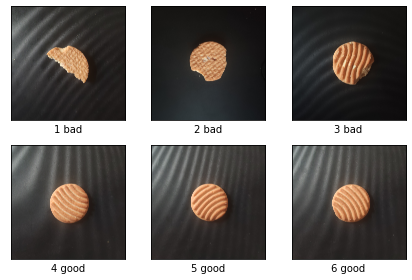

In [150]:
image_position = 0
plt.figure(0, figsize = (12,20))
fig, axes = plt.subplots(2,3)

for classes in os.listdir("Test/"):
    for index in range(0,len(os.listdir("Test/"+classes))):
        image = Image.open(r"Test/" + classes + "/" + os.listdir("Test/" + classes)[index])
        image_position += 1
        plt.subplot(2, 3, image_position)
        axes[os.listdir("Test/").index(classes),image_position if image_position<3 else image_position%3] = plt.imshow(image)
        plt.xlabel(str(image_position) + ' ' + classes)
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()

In [151]:
model.predict_classes(X_val)

array([0, 0, 0, 1, 1, 1], dtype=int64)

# Plot Learning Curves

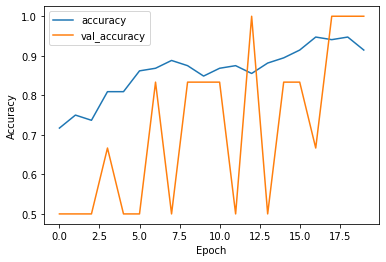

In [142]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss Curve

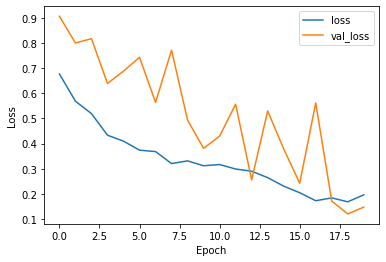

In [143]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()